[0, 3.9967483677176165, 5.1602665470892015, 5.182087140810749, 9.439481824943964]
[0, 4.5129972783239705, 5.299971735843655, 5.823178171124662, 6.680999450845614, 6.905229926173182, 8.937133388980866, 9.499258333469221]
[0, 3.9967483677176165, 4.5129972783239705, 5.1602665470892015, 5.182087140810749, 5.299971735843655, 5.823178171124662, 6.680999450845614, 6.905229926173182, 8.937133388980866, 9.439481824943964, 9.499258333469221]


TypeError: title() missing 1 required positional argument: 'label'

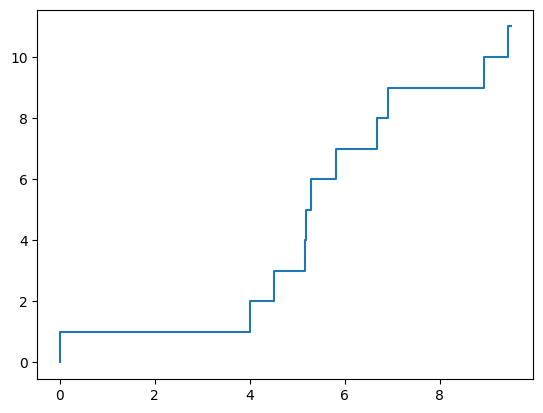

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
def generuj_poissona(T, lamb, lamb_max):
    t = 0
    I = 0
    S = [0]

    while True:
        u1 = np.random.rand()
        t -= np.log(u1) / lamb_max
        if t > T:
            break
        u2 = np.random.rand()
        if u2 <= lamb(t) / lamb_max:
            I += 1
            S.append(t)
    return I, S
# pierwsza funkcja
def lamb(t):
    return  0.1 * t

t = np.linspace(0, 15, 1000)
lamb_max = max(lamb(t))
# druga funkcja
def lamb2(t):
    return 1/(t+1)
lamb_max2 = max(lamb2(t))
I1,S1=generuj_poissona(10,lamb,lamb_max)
I2,S2=generuj_poissona(10,lamb,lamb_max)
# suma funckji
def merge_poisson_processes(S1, S2):
    merged_events = sorted(S1 + S2)
    merged_events.pop(0)
    return merged_events
merged_events = merge_poisson_processes(S1, S2)
print(S1)
print(S2)
print(merged_events)
plt.step(merged_events,np.arange(0,len(merged_events),1))
plt.title()
plt.show()

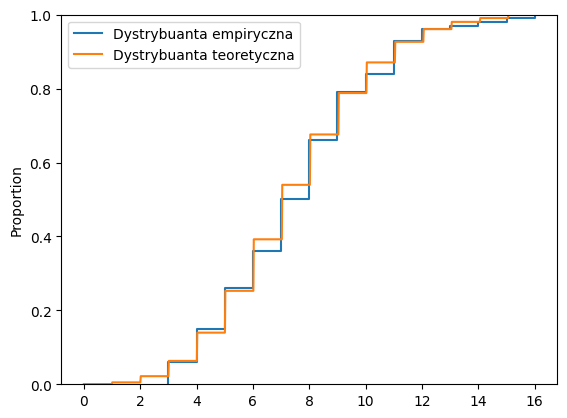

In [4]:
def generuj_poissona(T, lamb, lamb_max):
    t = 0
    I = 0
    S = []

    while True:
        u1 = np.random.rand()
        t -= np.log(u1) / lamb_max
        if t > T:
            break
        u2 = np.random.rand()
        if u2 <= lamb(t) / lamb_max:
            I += 1
            S.append(t)
    return I, S

def lamb3(t):
    return 1/(t+1) + t

def intlamb3(t):
    return np.log(t+1)+ 0.05*t**2

lamb_max3 = max(lamb3(t))
N=np.zeros(100)
for i in range(100):
    I1,S1=generuj_poissona(10,lamb,lamb_max)
    I2,S2=generuj_poissona(10,lamb2,lamb_max2)
    N[i]=I1+I2
t2=np.linspace(0,lamb_max3,1000)
I3, S3 = generuj_poissona(T=10, lamb=lamb3, lamb_max=lamb_max3)
sns.ecdfplot(N, label="Dystrybuanta empiryczna")
plt.plot(t2, scipy.stats.poisson.cdf(t, intlamb3(10)), label="Dystrybuanta teoretyczna")
plt.legend()
plt.show()